#### Project Title : Global Prosperity Insight: Estimating Welfare Levels of crowdfunding platform Borrowers

Project Description: The project is an in-depth analysis of Kiva microloans, their utilization, and their socioeconomic implications on a global scale. Kiva is a pioneering platform that connects lenders with individuals and groups seeking financial assistance, particularly in underserved regions. This project combines data analysis and data visualization to shed light on how Kiva loans are distributed, utilized, and their influence on different countries and regions.

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## in order to show more columns.
pd.options.display.max_columns = 999

In [ ]:
countries = pd.read_csv("/content/countries of the world.csv")

## From Data Science for good: Kiva funding.
kiva_loans = pd.read_csv("/content/kiva_loans.csv")
loan_themes = pd.read_csv("/content/loan_themes_by_region.csv")
mpi_region_locations = pd.read_csv("/content/kiva_mpi_region_locations.csv")
theme_id = pd.read_csv("/content/loan_theme_ids.csv")

## From additional data sources.
country_stats = pd.read_csv("/content/country_stats.csv")
lenders = pd.read_csv("/content/lenders.csv")
loan_coords = pd.read_csv("/content/loan_coords.csv")
locations = pd.read_csv("/content/locations.csv")

##mpi
mpi_national = pd.read_csv("/content/MPI_national.csv")
mpi_subnational = pd.read_csv("/content/MPI_subnational.csv")

In [ ]:
# Renaming the columns
loan_themes.rename(columns={'Field Partner Name':'field_partner_name',
                            'Loan Theme ID':'loan_theme_id',
                            'Loan Theme Type':'loan_theme_type',
                            'Partner ID':'partner_id'}, inplace = True)
## renaming the columns just how I like it
theme_id.columns = ['id','loan_theme_id','loan_theme_type','partner_id']
mpi_subnational.columns = ['ISO_country_code',
                           'Country',
                           'Sub_national_region',
                           'world_region',
                           'MPI_national',
                           'MPI_regional',
                           'Headcount_ratio_regional',
                           'intensit_of_deprivation_regional']

In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16.0,NaN,female,monthly,2014-01-01


In [ ]:
loan_themes.head()

,partner_id,field_partner_name,sector,loan_theme_id,loan_theme_type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,7,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,1383,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,3,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [ ]:
mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


#### 1. Countries with most loans vs Amounts

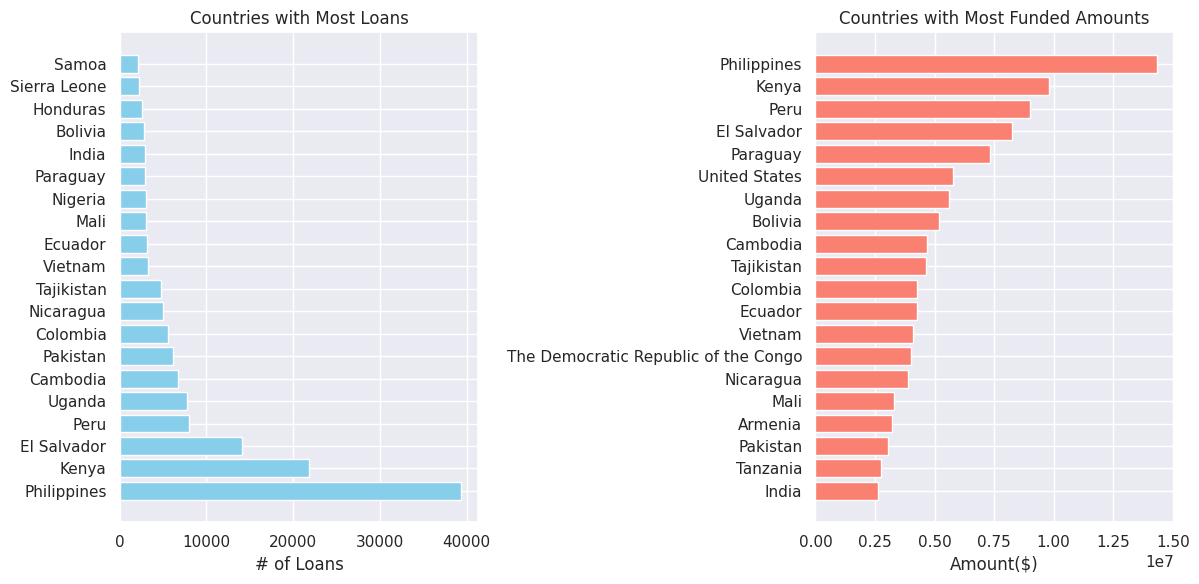

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
countries_loan_counts = kiva_loans['country'].value_counts().head(20).sort_values(ascending=True)
countries_donation_amounts = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending=False).head(20)

# Plotting the bar chart for countries with most loans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(countries_loan_counts.index, countries_loan_counts.values, color='skyblue')
plt.xlabel('# of Loans')
plt.title('Countries with Most Loans')
plt.gca().invert_yaxis()

# Plotting the bar chart for countries with most funded amounts
plt.subplot(1, 2, 2)
plt.barh(countries_donation_amounts.index, countries_donation_amounts.values, color='salmon')
plt.xlabel('Amount($)')
plt.title('Countries with Most Funded Amounts')
plt.gca().invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


We are looking at the top 20 countries with most loans (left) and most funded amounts (right).
Philippines is the country with highest loan counts(160,441) and highest funding amount of $ 54,47,638.
Kenya is second on the line in both of these criteria with approximately 76,000 loans and $32,000 fundings.
Some other countries that are in the top for both of these criteria are El Salvador, Peru, Cambodia, Colombia, Paraguay,
Uganda, and Ecuador. Most of these countries are located in South America and a few from Asia and Africa.

#### 2. Region with most loans vs Amounts

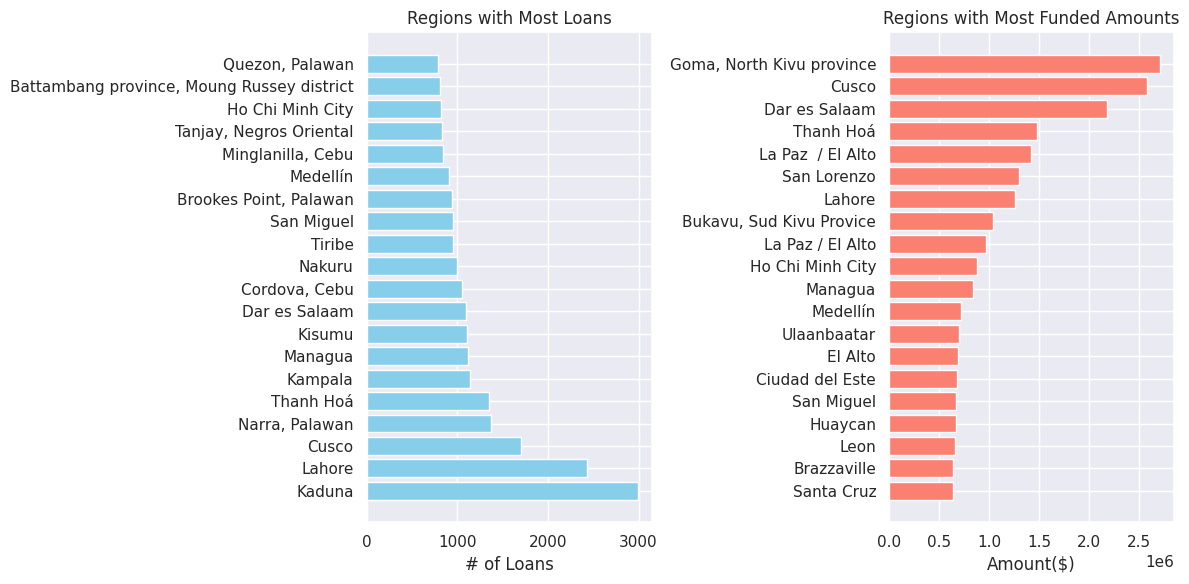

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
kiva_loans.replace("CUSCO", "Cusco", inplace=True)
regions_loan_counts = kiva_loans['region'].value_counts().head(20).sort_values(ascending=True)
regions_donation_amounts = kiva_loans.groupby(['region'])['funded_amount'].sum().sort_values(ascending=False).head(20)

# Plotting the bar chart for regions with most loans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(regions_loan_counts.index, regions_loan_counts.values, color='skyblue')
plt.xlabel('# of Loans')
plt.title('Regions with Most Loans')
plt.gca().invert_yaxis()

# Plotting the bar chart for regions with most funded amounts
plt.subplot(1, 2, 2)
plt.barh(regions_donation_amounts.index, regions_donation_amounts.values, color='salmon')
plt.xlabel('Amount($)')
plt.title('Regions with Most Funded Amounts')
plt.gca().invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
feature = "region"
temp = pd.DataFrame(round(kiva_loans[feature].value_counts(dropna = False, normalize=True)*100,2)).reset_index().rename(columns = {'index':feature,feature:"Percentage of Total"})
temp.dropna(inplace=True)
temp = temp.head(10)
print(" {} ".format(temp.columns[1]).center(40,"*"))
#print ("***** CompanySize *****".center(60, '*') )

for a, b in temp.itertuples(index=False):
    print("{}% loans are given to {}.".format(b, a))
print ('#####')

temp = pd.DataFrame(kiva_loans.groupby(['region'])['funded_amount'].sum().sort_values(ascending = False).head(20)).reset_index().rename(columns = {'index':feature,feature:"Percentage of Total Loan"})
temp.dropna(inplace=True)
temp = temp.head(10)
print(" {} ".format(temp.columns[1]).center(40,"*"))
#print ("***** CompanySize *****".center(60, '*') )

for a, b in temp.itertuples(index=False):
    print("{} loans are given to {}.".format(b, a))


********* Percentage of Total **********
1.61% loans are given to Kaduna.
1.31% loans are given to Lahore.
0.92% loans are given to Cusco.
0.74% loans are given to Narra, Palawan.
0.72% loans are given to Thanh Hoá.
0.61% loans are given to Kampala.
0.6% loans are given to Managua.
0.59% loans are given to Kisumu.
0.59% loans are given to Dar es Salaam.
0.57% loans are given to Cordova, Cebu.
#####
************ funded_amount *************
2712050.0 loans are given to Goma, North Kivu province.
2575425.0 loans are given to Cusco.
2179325.0 loans are given to Dar es Salaam.
1478650.0 loans are given to Thanh Hoá.
1415700.0 loans are given to La Paz  / El Alto.
1294925.0 loans are given to San Lorenzo.
1260400.0 loans are given to Lahore.
1036225.0 loans are given to Bukavu, Sud Kivu Provice.
961725.0 loans are given to La Paz / El Alto.
878700.0 loans are given to Ho Chi Minh City.


#### 3. Top Sectors with Most Loans


In [ ]:
temp = kiva_loans.sector.value_counts()

print(temp.index)
print(temp.values)

Index(['Agriculture', 'Food', 'Retail', 'Services', 'Housing', 'Clothing',
       'Education', 'Personal Use', 'Transportation', 'Arts', 'Construction',
       'Manufacturing', 'Health', 'Entertainment', 'Wholesale'],
      dtype='object')
[47151 38963 36289 12793 11615 10551  8802  6111  4569  2765  1996  1947
  1821   234   174]


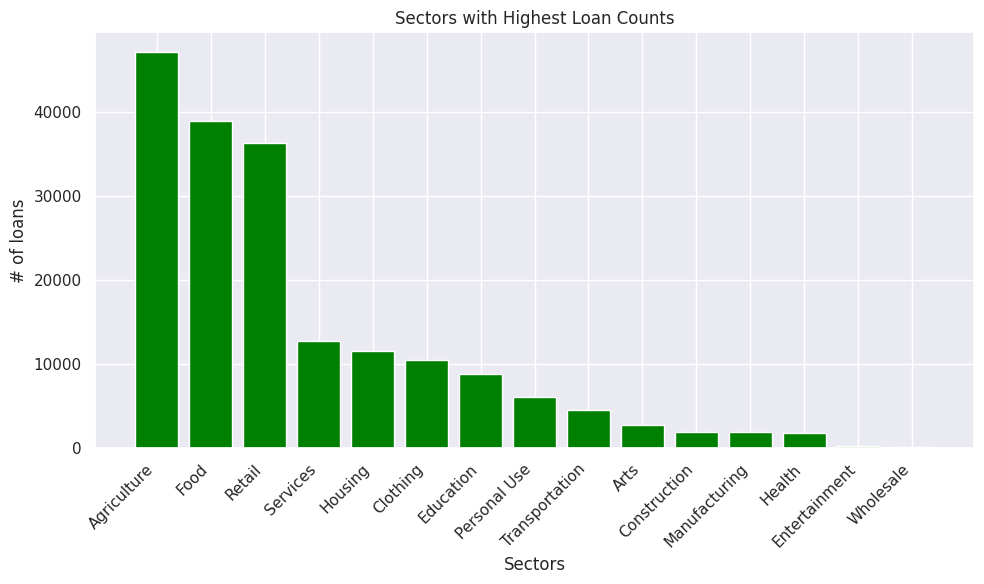

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated temp and have it as a pandas Series

plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color='green')
plt.title('Sectors with Highest Loan Counts')
plt.xlabel('Sectors')
plt.ylabel('# of loans')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Agriculture, Food and Retail are the top sectors with most loan counts.

#### 4. Top Sectors with Most Fundings

In [ ]:
temp = kiva_loans.groupby(['sector'])['funded_amount'].sum().sort_values(ascending= False)

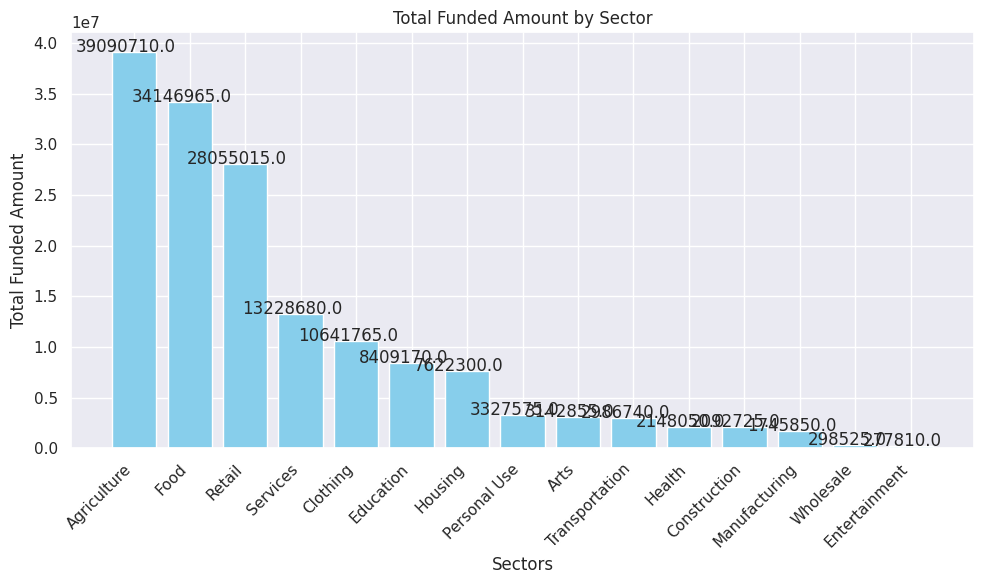

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(temp.index, temp.values, color='skyblue')

plt.xlabel('Sectors')
plt.ylabel('Total Funded Amount')
plt.title('Total Funded Amount by Sector')
plt.xticks(rotation=45, ha='right')

# Add data values on top of the bars
for bar, label in zip(bars, temp.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, str(label), ha='center')

plt.tight_layout()
plt.show()


##### Similar to previous chart Agriculture, Food and Retail are the top sectors with most loan amounts

##### 5. Top Activities

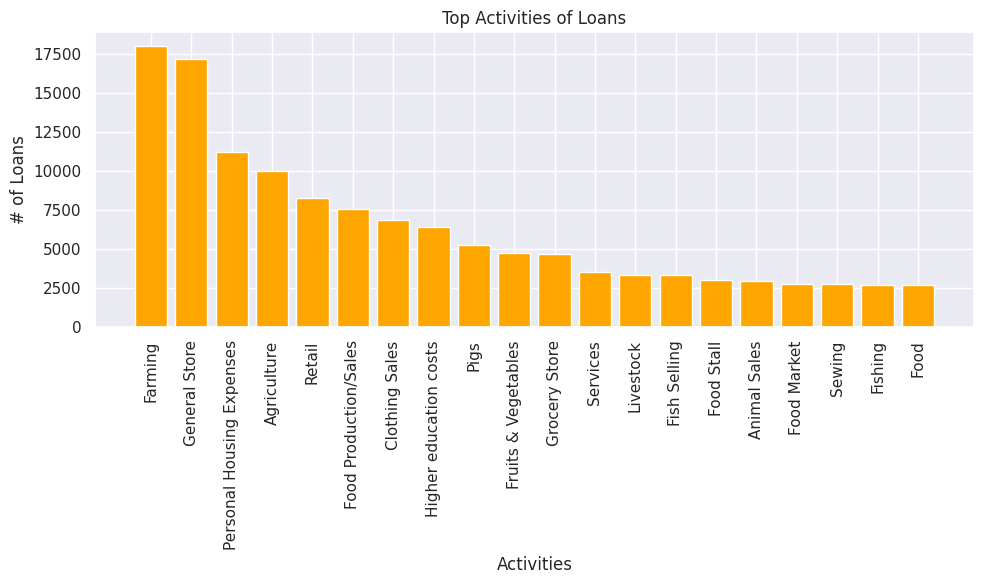

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
temp = kiva_loans['activity'].value_counts().head(20)

# Plotting the bar chart for top activities of loans
plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color='orange')
plt.xlabel('Activities')
plt.ylabel('# of Loans')
plt.title('Top Activities of Loans')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

##### Farming & General Store are the top activities done by loan borrowers.

##### 6. Terms in Months¶


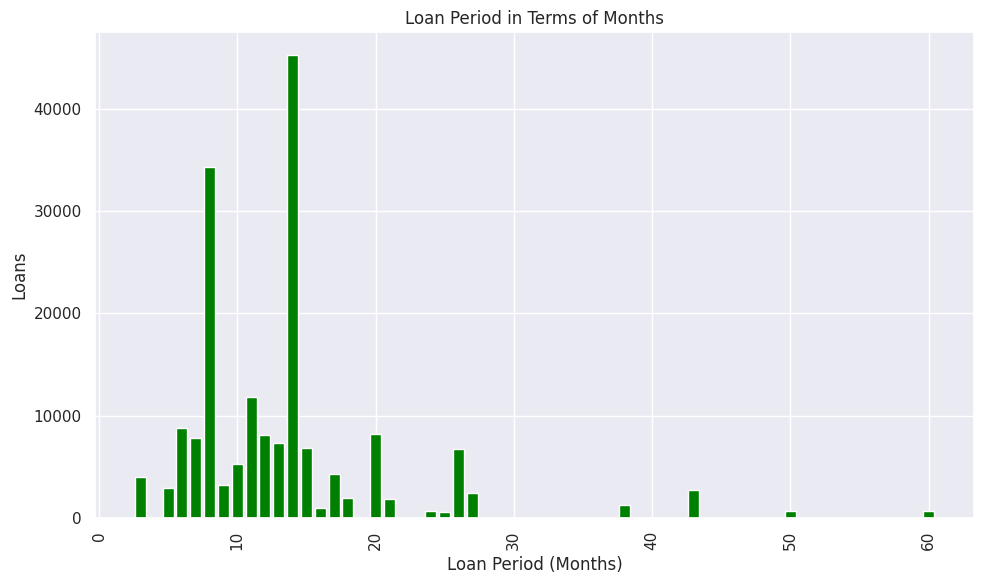

In [ ]:
# Data preparation
temp = kiva_loans['term_in_months'].value_counts().head(25)

# Plotting the bar chart for loan period in terms of months
plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color='green')
plt.xlabel('Loan Period (Months)')
plt.ylabel('Loans')
plt.title('Loan Period in Terms of Months')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

##### Most of the loan payments are constructed to last for either 8 month or 14 months.

#### 7. Sectors with Highest Loan Counts

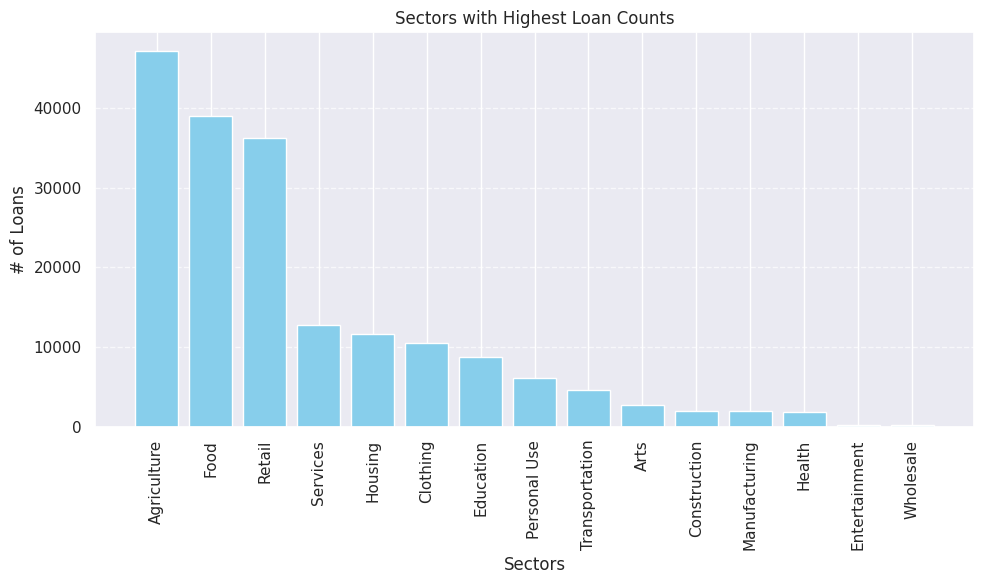

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
temp = kiva_loans['sector'].value_counts()

# Plotting the bar chart for sectors with highest loan counts
plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color='skyblue')
plt.xlabel('Sectors')
plt.ylabel('# of Loans')
plt.title('Sectors with Highest Loan Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()


#### Agriculture, Food and Retail are the top sectors with most loan counts.

##### 8. Top Sectors with Most Fundings¶


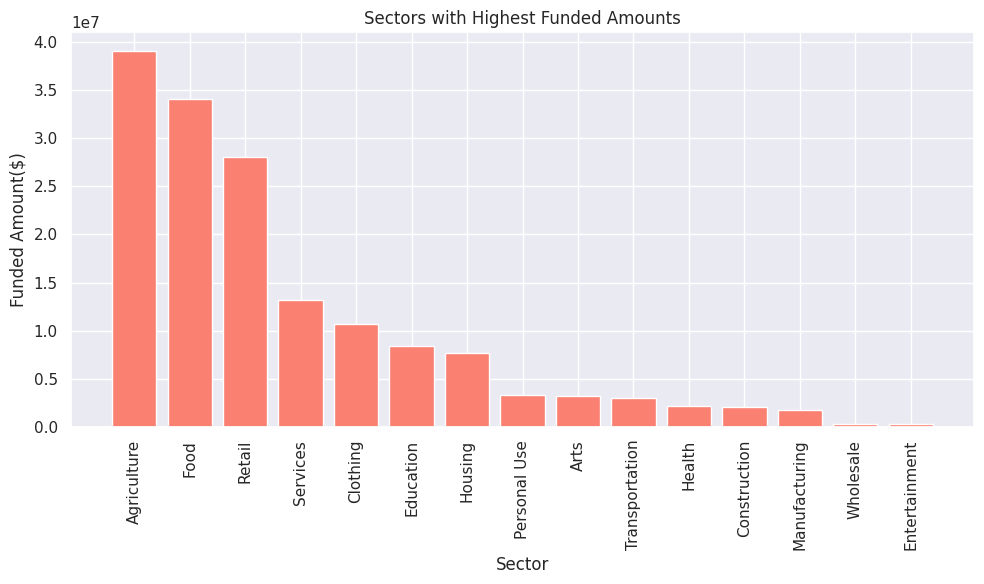

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
temp = kiva_loans.groupby(['sector'])['funded_amount'].sum().sort_values(ascending=False)

# Plotting the bar chart for sectors with highest funded amounts
plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color='salmon')
plt.xlabel('Sector')
plt.ylabel('Funded Amount($)')
plt.title('Sectors with Highest Funded Amounts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


##### Similar to previous chart Agriculture, Food and Retail are the top sectors with most loan amounts.

##### 9. Borrower's repayment interval¶


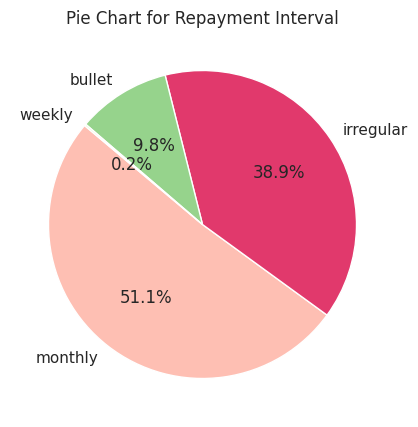

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
temp = kiva_loans['repayment_interval'].value_counts()

labels = temp.index
values = temp.values
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

# Plotting the pie chart for repayment interval
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Chart for Repayment Interval')
plt.show()


##### More than half of the payment intervals are monthly, there are also irregular, bullet and small percentage of weekly payments.**

##### 10. Top Uses of the Loans¶


In [ ]:

## I noticed that some of the data is inconsistant and are basically repeated because of upper/lower case difference.
kiva_loans.use = kiva_loans.use.str.lower()
## Also I stumbled upon lines where the only difference is a ".". So, I got rid of the difference.
kiva_loans.use = kiva_loans.use.str.strip('.')
## Its always a good idea to get rid of any extra white spaces.
kiva_loans.use = kiva_loans.use.str.strip()
kiva_loans.use = kiva_loans.use.str.strip('.')

##There are different version so saying the same thing. therefore I have decided to merge them all together.
kiva_loans.replace('to buy a water filter to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for his family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter, to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter, to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water for their families', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to purchase a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to purchase a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
kiva_loans.replace('to buy a water filter in order to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)

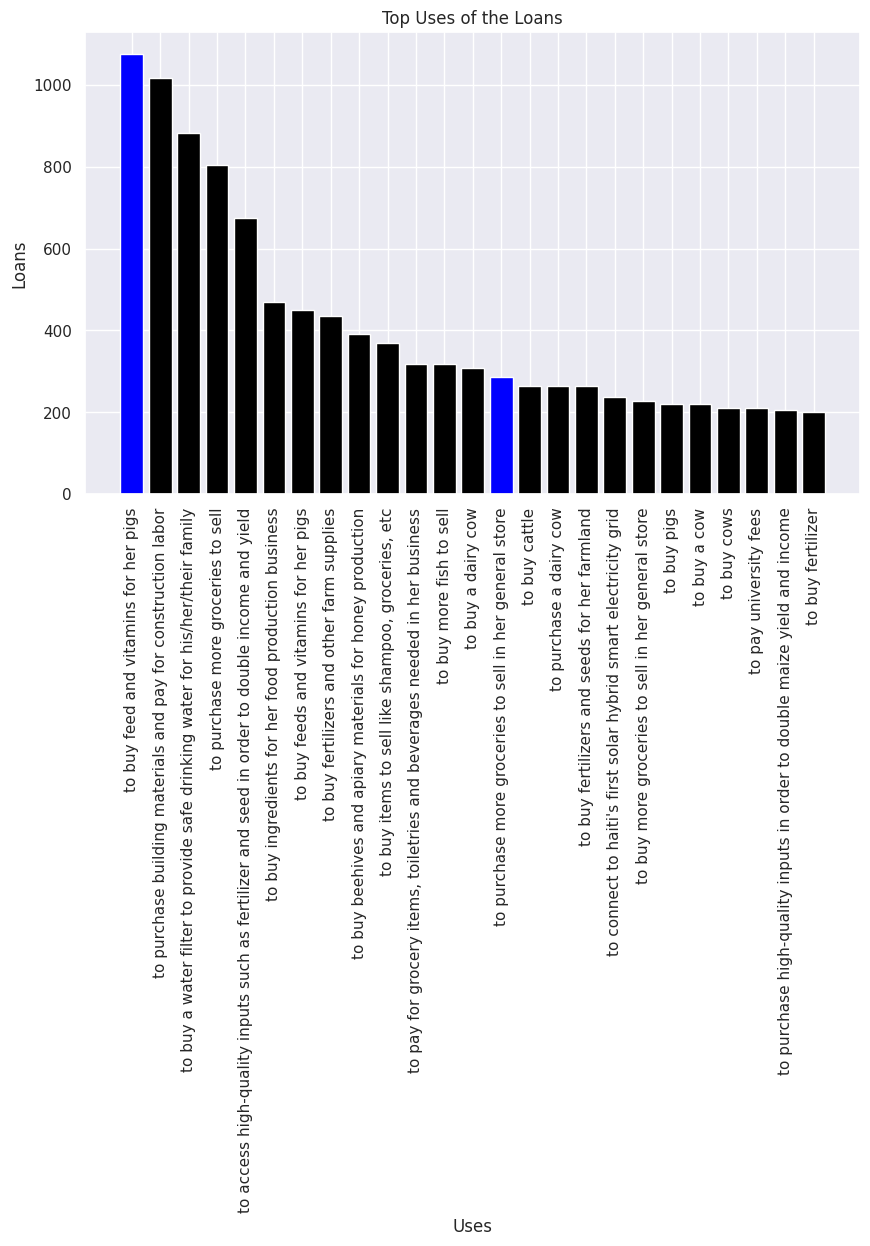

In [ ]:
temp = kiva_loans.use.value_counts().head(25)

plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color=['blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'])

plt.title("Top Uses of the Loans")
plt.xlabel("Uses")
plt.ylabel("Loans")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


##### It is spectacular to see that, almost 16,000 people took loans just to buy filter so that they can get access to safe drinking water. I am interested in finding out which countries these peoples are from.

##### 11. Top contries with most people

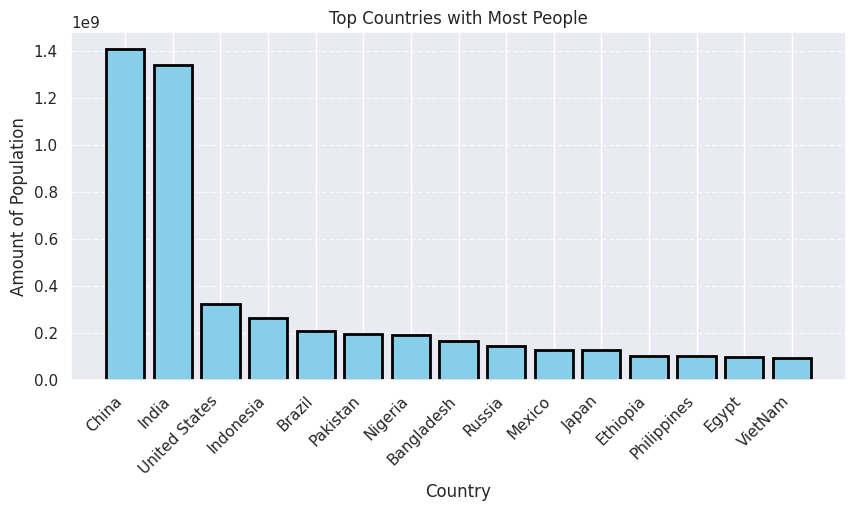

In [ ]:
temp = country_stats[['country_name','population']].sort_values(by ='population', ascending = False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(temp.country_name, temp.population, color='skyblue', edgecolor='black', linewidth=2)
plt.xlabel('Country')
plt.ylabel('Amount of Population')
plt.title('Top Countries with Most People')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.subplots_adjust(bottom=0.3)  # Adjust bottom margin to accommodate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()


##### As expected China and India are the top populated countries followed by United States. However, my attention is geared towards Pakistan, Nigeria, Bangladesh, Ethiopia and Philippines from this list as they are some of the developing countries and managed to be a part of this chart. Let's see how these country stands in the population below poverty line scale.

##### 12. Male-Female Ratio

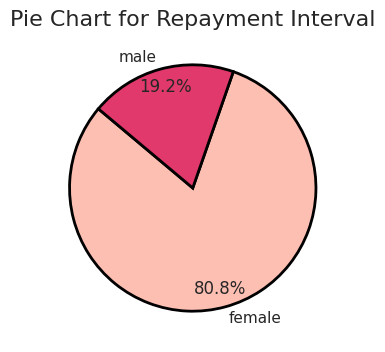

In [ ]:
temp = pd.DataFrame(kiva_loans.borrower_genders.dropna().str.split(",").tolist()).stack().value_counts().reset_index()
temp.rename(columns={'index':'gender', 0:'total'}, inplace=True)
temp.gender = temp.gender.apply(lambda x: x.strip())
temp = temp.groupby(['gender'])['total'].sum().reset_index()

labels = temp.gender
values = temp.total

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})

plt.title("Pie Chart for Repayment Interval", fontsize=16)
plt.show()


### 13.Population and all things¶

#### Population

In [ ]:
countries.replace("Congo, Dem. Rep.", 'Democratic Republic of the Congo', inplace=True)
##
countries.rename(columns = {'GDP ($ per capita)':"GDP"}, inplace = True)
countries.rename(columns = {'Pop. Density (per sq. mi.)':"pop_density_per_sq_mile"}, inplace = True)
countries.pop_density_per_sq_mile = countries.pop_density_per_sq_mile.apply(lambda x: int(x.replace(",","")))
countries.Country = countries.Country.apply(lambda x:x.strip())
country_stats = country_stats.merge(countries[['Country',"GDP",'pop_density_per_sq_mile']], left_on ='country_name',right_on='Country', how='left')

##

In [ ]:
import plotly.graph_objects as go
data = [dict(
        type='choropleth',
        locations= country_stats.country_name,
        locationmode='country names',
        z=country_stats.population,
        text=country_stats.country_name,
#         colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False,
            tickprefix='',
            title='Polulations'),
)]
layout = dict(title = 'Population Map of the world', geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile','population','population_below_poverty_line']].sort_values(by = 'population', ascending = False).head(14)
for col in temp.columns:
    temp[col] = temp[col].astype(str)
temp['text'] = temp['kiva_country_name'] + '<br>' + 'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
temp['population_below_poverty_line'] = temp['population_below_poverty_line'].astype(float)
trace0 = go.Scatter(
    x=temp.population,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    marker = { 'color': temp.population_below_poverty_line.tolist(),
            #'colorscale':"RdYlGn",
            'size': (temp.pop_density_per_sq_mile/80).tolist(),
            'showscale': False,
            'line': dict(width=2, color='black')
        }
)
layout = go.Layout(
    paper_bgcolor='rgb(243, 243, 200)',## asix and lebel background color
    plot_bgcolor='rgb(243, 243, 200)', ## plot background color
    title = "Population, Population Density and Population Below Poverty Line",
    height = 800,
    xaxis = dict(     title = "Population"
    ),
    yaxis = dict(
        title = "Population Below Poverty Line"
    )

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

The big circle is the first thing to take my attention. Here **the size of the circle** represents the **population density** of each country while x and y-axis represent population and population below poverty line consecutively. That represents **Bangladesh** which is not only one of the countries with top populations but also one of the most densely populated countries in the world. In addition to that **Bangladesh** has a score of 31.5 in the Population below poverty line scale. Speaking of that scale, **Nigeria** is the poorest county with lots of people to appreciate assistance from KIVA. I am interested in looking into more in-depth about how KIVA is helping out the people in these two countries. But for now, let's see an overview of how other nations fall in the Population below poverty line scale.

#### Population Below Poverty Line¶


In [ ]:
data = [dict(
        type='choropleth',
        locations= country_stats.country_name,
        locationmode='country names',
        z=country_stats.population_below_poverty_line,
        text=country_stats.country_name,
        marker=dict(
#             colorscale='Red',
            line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False,
            tickprefix='',
            title='Polulation<br>below<br>poverty<br>line'),
)]
layout = dict(title = 'Population Below Poverty Line',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

Most of the countries in Africa lives way below poverty line. aThis may be a good time to bring up GDP per capita since they are nege.Let's create a map for that as well.

#### GDP Per Capita

In [ ]:
temp = countries[['Country',"GDP"]].sort_values(by = 'GDP', ascending = False)
data = [dict(
        type='choropleth',
        locations= temp.Country,
        locationmode ='country names',
        z=temp.GDP,
        text=temp.Country,
        colorscale='BuGn',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False,
            tickprefix='', title='GDP<br>Per<br>Capita'),
)]
layout = dict(title = 'World countries with polulations',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

**North American**, **Austraila** and **European** countries are the one with highest GDP Per Capita. Meanwhile countries in** Africa** and Asia are the once with lowest GDP Per Capita.